# Verifying FedAvg
We first consider the following example to verify that FedAvg works on the example when the stochastic gradients violate relaxed growth condition but satisfy ABC condition. We consider $n=2$ case, where
$$
f_1(x) = f_2(x) = f(x) = \begin{cases}
\frac{x^2}{2}, & |x|< 1, \\
|x| - \frac{1}{2}, & \text{Otherwise}
\end{cases},
$$
the stochastic gradient is set as
$$
g_1(x) = g_2(x) = g(x) = \begin{cases}
\nabla f(x) + \sqrt{|x|}, &\text{with probability 1/2}\\
\nabla f(x) - \sqrt{|x|}, &\text{with probability 1/2}
\end{cases}
$$


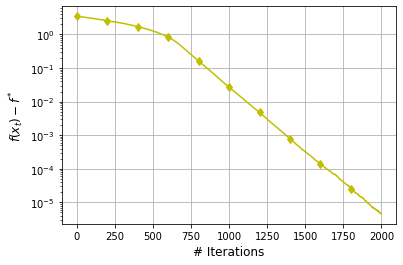

# BGD can be invariant while the performance of FedAvg varies

We consider 
$$
f_1(x) = x^2, \ f_2(x) = \begin{cases}
\frac{(x-d)^2}{2}, & |x-d|< 1, \\
|x-d| - \frac{1}{2}, & \text{Otherwise}
\end{cases},
$$


where larger $|d|$ indicates larger $f^* - \frac{1}{2}(f_1^* + f_2^*)$.  To obtain a tight estimate of $(\zeta^2,\psi^2)$ in the BGD assumption, we consider the subproblem
$$
\min_{\zeta,\psi>0}\zeta^2+\psi^2,\text{ s.t. }\frac{1}{2}\sum_{i=1}^2\Vert \nabla f_i(x)-\nabla f(x)\Vert^2\leq \zeta^2 + \psi^2\Vert\nabla f(x)\Vert^2, \forall x\in\mathbb{R}.
$$
It suffices to consider three cases:

* $x-d>1$, the constraint becomes
  $$
  \frac{1}{2}(1 + 4x^2)\leq \zeta^2 + \psi^2(x+\frac{1}{2})^2.
  $$

* $x-d<-1$, the constrain becomes
  $$
  \frac{1}{2}(1+4x^2)\leq \zeta^2+\psi^2(x + \frac{-1}{2})^2.
  $$

* $|x-d|\leq 1$, the constraint becomes
  $$
  \frac{1}{2}((x-d)^2+4x^2)\leq \zeta^2+\psi^2(x + \frac{x-d}{2})^2.
  $$

For $|d|>2$, we conclude the above three constraints lead to the same minimal value of $\zeta^2 +\psi^2$ for any $x\in\mathbb{R}$. Therefore, the two constants of BGD assumption are invariant. However, the performance of FedAvg varies according to different $d$'s as shown in the following figure.



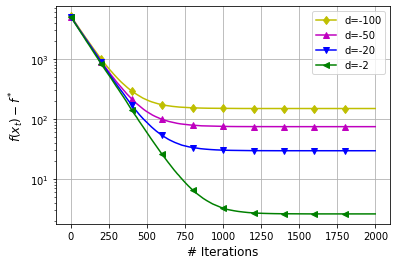